In [36]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')


# Part 1

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npKernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

pricing = pd.DataFrame({
'prices': [100, 90, 70, 60, 40, 20, 10],
'demand': [100, 120, 200, 300, 1200, 2000, 2800]
})
def revenue_maximizing_price(prices, demand):
    prices = [[price] for price in prices] #Format so it is suitable for single instance predictions.

    poly = PolynomialFeatures(degree=2, include_bias=False) #Polynomial reg.
    poly_features = poly.fit_transform(prices)

    reg =  LinearRegression().fit(poly_features, demand)
    predicted_demands = np.zeros(100)
    poly_features_all_prices = poly.fit_transform(np.linspace(1, 100, num=100).reshape(-1,1))

    for i in range(0, 100):
        predicted_demands[i] =  reg.predict([poly_features_all_prices[i]]) # Calculate corresponding the demand and thus the revenue

    predicted_revenue = predicted_demands * np.linspace(1, 100, num=100)
    return predicted_demands, predicted_revenue, np.amax(predicted_revenue), np.argmax(predicted_revenue)+1

    

In [38]:
pred_demands, pred_rev, max_rev, rev_max_price = revenue_maximizing_price(pricing['prices'].tolist(), pricing['demand'].tolist())

In [39]:
print(max_rev, rev_max_price)

46308.5021005633 30


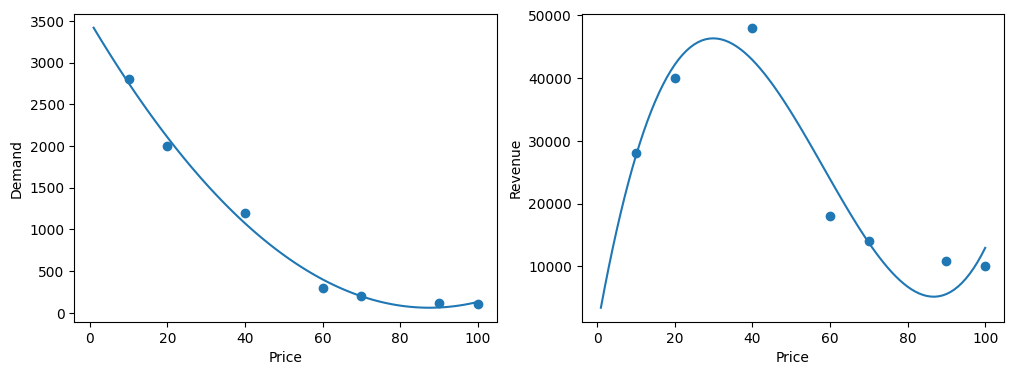

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(np.linspace(1,100,100), pred_demands)
ax1.scatter(pricing['prices'].tolist(), pricing['demand'].tolist())
ax1.set_xlabel('Price')
ax1.set_ylabel('Demand')
ax2.plot(np.linspace(1,100,100), pred_rev )
ax2.set_xlabel('Price')
ax2.set_ylabel('Revenue')
ax2.scatter(pricing['prices'].tolist(), pricing['prices'].to_numpy()*pricing['demand'].to_numpy())

# Part 2

| quantity   |  supplier price  |
|:-----------|-----------------:|
| <= 50      |        15        |
| 51 - 100   |        12        |
| 101 - 200  |         8        |
| > 200      |         4        |

In [41]:
def calculate_profit(price, sale): # Calculate profit data points from demand, given the supplier pricing info.
    revenue = sale*price
    if sale <= 50:
        return price*sale - 15*sale
    elif sale > 50 and sale <=100:
        return price*sale - 15*50 - (sale-50)*12
    elif sale > 100 and sale <=200:
        return price*sale - 15*50 - 12*50 - (sale-100)*8
    else:
        return price*sale - 15*50 - 12*50 - 100*8 - (sale-200)*4


In [42]:
profits = []
prices = pricing['prices'].tolist()
demand = pricing['demand'].tolist()
for i in range(len(prices)):
    profits.append(calculate_profit(prices[i], demand[i]))

In [43]:
profits

[8650, 9290, 11850, 15450, 41850, 30650, 15450]

In [44]:
def profit_maximizing_price(prices, profit):
    #Same as the revenue maximizing function, except, the polynomial degree is 5 instead of 2 due to more reasonable fit on the data.
    prices = [[price] for price in prices]
    poly = PolynomialFeatures(degree=5, include_bias=False)
    poly_features = poly.fit_transform(prices)
    reg =  LinearRegression().fit(poly_features, profit)
    predicted_profits = np.zeros(100)
    poly_features_all_prices = poly.fit_transform(np.linspace(1, 100, num=100).reshape(-1,1))
    for i in range(0, 100):
        predicted_profits[i] = reg.predict([poly_features_all_prices[i]])
    return predicted_profits, np.amax(predicted_profits), np.argmax(predicted_profits) + 1

In [45]:
pred_profit, max_profit, profit_max_price = profit_maximizing_price(prices, profits)

In [46]:
print(max_profit, profit_max_price)

42274.35161492055 34


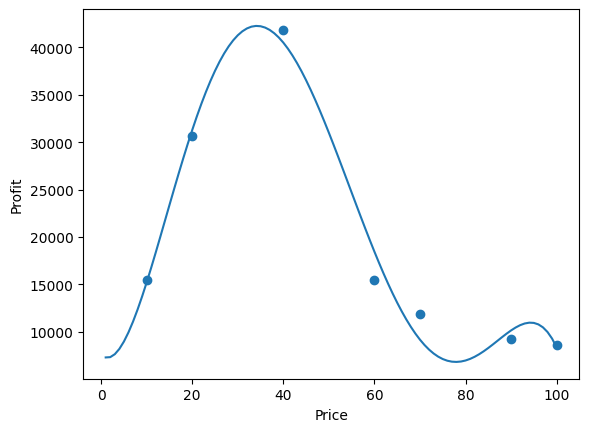

In [47]:
fig = plt.figure()
ax = plt.axes()
ax.plot(np.linspace(1,100,100), pred_profit)
ax.set_xlabel('Price')
ax.set_ylabel('Profit')
ax.scatter(prices, profits)
